# **Tugas 3 | Klasifikasi Data K-NN**

Algoritma KNN atau K-Nearest Neighbor adalah salah satu algoritma yang banyak digunakan di dunia machine learning untuk kasus klasifikasi.

Seperti yang telah disebutkan, algoritma KNN merupakan algoritma klasifikasi yang bekerja dengan mengambil sejumlah K data terdekat (tetangganya) sebagai acuan untuk menentukan kelas dari data baru. Algoritma ini mengklasifikasikan data berdasarkan similarity atau kemiripan atau kedekatannya terhadap data lainnya.

## Cara Kerja Algoritma K-Nearest Neighbor

### Menentukan nilai K

Nilai k pada algoritma KNN mendefinisikan berapa banyak tetangga yang akan diperiksa untuk menentukan klasifikasi titik kueri tertentu. Misalnya, jika **k=1**, instance akan ditugaskan ke kelas yang sama dengan tetangga terdekatnya. 

### Menghitung Jarak Data

Hitung jarak dari jumlah tetangga K (bisa menggunakan salah satu metrik jarak, misalnya Euclidean distance)

**Rumus :**
> $d(x,y) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

### Mengurutkan jarak

Setelah berhasil menghitung semua jarak pada data latih dengan data uji, maka urutkan semua jarak yang sudah di dapat dari yang terkecil sampai terbesar

### Ambil Tetangga Terdekat K

Ambil tetangga terdekat K sesuai jarak yang dihitung.

### Tentukan Mayoritas

Dari data tetangga yang sudah di ambil berdasarkan K, tentukan kategori mayoritas yang ada. Maka dari itu, data uji tersebut merupakan tetangga dari data mayoritas tersebut.

## Membaca Data

In [ ]:
import pandas as pd 
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
data

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

## Import fungsi load_iris dari modul datsets

Untuk import fungsi load_iris dari modul dataset menggunakan libary `sklearn.datasets`

In [ ]:
#Import the load_iris function from datsets module
from sklearn.datasets import load_iris

### Kemudian di masukkan kedalam variable, agar bisa di gunakan seterusnya

In [ ]:
#Create bunch object containing iris dataset and its attributes.
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
#Print the iris data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Mencetak kolom yang terdapat pada data

In [ ]:
#Names of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Mentransformasikan

Bilangan bulat yang mewakili spesies: 0 = `setosa`, 1=`versicolor`, 2=`virginica`

In [ ]:
#Integers representing the species: 0 = setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
# we have a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [ ]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Membagi (Split) data

Pada kasus ini, membagi data menjadi set pelatihan dan pengujian (80:20) %
**Rumus :**
> Jumlah data uji : $\frac{persentase data uji}{100} jumlah data$


In [ ]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


## Mencari Akurasi dengan K =  1 sampai 25

mencari akurasi yang lebih besar dengan data latih dan data uji yang sudah di split di atas. Namun sebelum menghitung akurasi, pada proses ini juga sudah menghitung jarak antar data sehingga dapat mengghitung akurasi.

In [ ]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

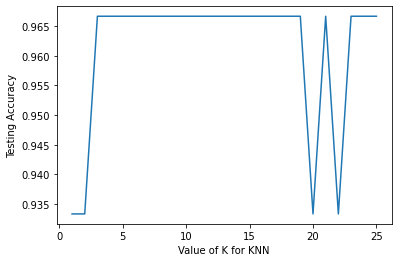

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Nilai K dengan **3** hingga **19** memiliki akurasi yang sama yaitu **96,66**, jadi kita dapat menggunakan salah satu nilai dari itu, saya memilih K sebagai 5 dan melatih model dengan data pelatihan penuh

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa
